In [1]:
# Import the 'pandas' library for data manipulation and analysis
import pandas as pd

# Import the 'warnings' module and set up a filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the 'matplotlib.pyplot' module for creating plots and visualizations
import matplotlib.pyplot as plt

# Import the 'seaborn' library for statistical data visualization
import seaborn as sns

In [2]:
# Read the CSV file 'QuakesToday.csv' and create a DataFrame
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Cleaning\Quakes_Country_tweet\QuakesToday.csv', sep=',')

In [3]:
df

,Datetime,Tweet Id,Text,Username
0,2023-05-31 22:31:04+00:00,1664036800384598016,1.6 magnitude #earthquake. 22 km from Encinita...,QuakesToday
1,2023-05-31 22:15:03+00:00,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, ...",QuakesToday
2,2023-05-31 22:11:03+00:00,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, M...",QuakesToday
3,2023-05-31 21:59:03+00:00,1664028745299283968,2.1 magnitude #earthquake. Central Alaska http...,QuakesToday
4,2023-05-31 21:46:14+00:00,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, H...",QuakesToday
...,...,...,...,...
12580,2023-02-16 22:08:02+00:00,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #...",QuakesToday
12581,2023-02-16 22:06:03+00:00,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow,...",QuakesToday
12582,2023-02-16 21:53:03+00:00,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, N...",QuakesToday
12583,2023-02-16 21:39:03+00:00,1626335374913204225,2.1 magnitude #earthquake. 3 km from ##Holtvil...,QuakesToday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12585 entries, 0 to 12584
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  12585 non-null  object
 1   Tweet Id  12585 non-null  int64 
 2   Text      12585 non-null  object
 3   Username  12585 non-null  object
dtypes: int64(1), object(3)
memory usage: 393.4+ KB


In [5]:
df.isna().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [6]:
# Convert the 'Datetime' column to datetime format using the specified format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S.%f')

# Extract the date from the 'Datetime' column and assign it to the 'Date' column
df['Date'] = pd.to_datetime(df['Datetime']).dt.date

# Extract the time from the 'Datetime' column and assign it to the 'Time' column
df['Time'] = pd.to_datetime(df['Datetime']).dt.time

# Drop the 'Datetime' column from the DataFrame
df.drop(['Datetime'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12585 entries, 0 to 12584
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet Id  12585 non-null  int64 
 1   Text      12585 non-null  object
 2   Username  12585 non-null  object
 3   Date      12585 non-null  object
 4   Time      12585 non-null  object
dtypes: int64(1), object(4)
memory usage: 491.7+ KB


In [8]:
df = df[['Date', 'Time', 'Tweet Id', 'Text', 'Username']]
df

,Date,Time,Tweet Id,Text,Username
0,2023-05-31,22:31:04,1664036800384598016,1.6 magnitude #earthquake. 22 km from Encinita...,QuakesToday
1,2023-05-31,22:15:03,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, ...",QuakesToday
2,2023-05-31,22:11:03,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, M...",QuakesToday
3,2023-05-31,21:59:03,1664028745299283968,2.1 magnitude #earthquake. Central Alaska http...,QuakesToday
4,2023-05-31,21:46:14,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, H...",QuakesToday
...,...,...,...,...,...
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #...",QuakesToday
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow,...",QuakesToday
12582,2023-02-16,21:53:03,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, N...",QuakesToday
12583,2023-02-16,21:39:03,1626335374913204225,2.1 magnitude #earthquake. 3 km from ##Holtvil...,QuakesToday


## Manipulation Data Column Text

Before manipulation, let see the several data in column text

In [9]:
pd.set_option('display.max_colwidth', None)
df['Text'].unique()

array(['1.6 magnitude #earthquake. 22 km from Encinitas, CA, #UnitedStates https://t.co/WpgddgQnAm',
       '1.8 magnitude #earthquake. 6 km from Volcano, #HI, United States https://t.co/4iK3hp1xBM',
       '5.2 magnitude #earthquake. 11 km from Ambon, Maluku, #Indonesia https://t.co/eUS1L2fLQX',
       ...,
       '4.8 magnitude #earthquake. Kermadec Islands, New Zealand https://t.co/atdgauHafH',
       '2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF',
       '1.9 magnitude #earthquake. 4 km from #MammothLakes, CA, United States https://t.co/nh0y2vXwf6'],
      dtype=object)

#### Now, Extract the earthquake magnitude from column text
As we can see the earthquake magnitude is the first text in every data<br>
With reguler Expression we can extract the data magnitude and the data Location<br>

For Example : <br>
1.6 magnitude #earthquake. 22 km from Encinitas, CA, #UnitedStates https://t.co/WpgddgQnAm <br>
1.8 magnitude #earthquake. 6 km from Volcano, #HI, United States https://t.co/4iK3hp1xBM <br>

from 2 example, we will know the earthquake magnitude is 1.6 and 1.8 <br>
for location is 22 km from Encinitas and 6 km from Volcano

In [10]:
# Extract the magnitude from the 'Text' column and assign it to the 'Magnitude' column
df['Magnitude'] = df['Text'].str.extract(r'(\d+\.\d+)')

# Extract the location from the 'Text' column and assign it to the 'Location' column
df['Location'] = df['Text'].str.extract(r'(\d+ km .+) https://t.co/')

In [11]:
def split_text(n):
    # Split the text at commas
    split_result = df['Text'].iloc[n].split(', ')
    
    # Check if there are more than 2 parts after splitting at commas
    if len(split_result) > 2:
        split_text = split_result[2]
        
    # Check if there are more than 1 part after splitting at commas
    elif len(split_result) > 1:
        split_text = split_result[1]
        
    else:
        # Split the text at periods
        split_result = df['Text'].iloc[n].split('. ')
        
        # Check if there are at least 2 parts after splitting at periods
        if len(split_result) >= 2:
            split_text = split_result[1]
        else:
            split_text = ''  # Handle cases where splitting doesn't produce enough parts
            
    return split_text

In [12]:
df['Country'] = df.index.map(split_text)

#### From the extraction data we will check if we get Nan data

In [13]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country
0,2023-05-31,22:31:04,1664036800384598016,"1.6 magnitude #earthquake. 22 km from Encinitas, CA, #UnitedStates https://t.co/WpgddgQnAm",QuakesToday,1.6,"22 km from Encinitas, CA, #UnitedStates",#UnitedStates https://t.co/WpgddgQnAm
1,2023-05-31,22:15:03,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, #HI, United States https://t.co/4iK3hp1xBM",QuakesToday,1.8,"6 km from Volcano, #HI, United States",United States https://t.co/4iK3hp1xBM
2,2023-05-31,22:11:03,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, Maluku, #Indonesia https://t.co/eUS1L2fLQX",QuakesToday,5.2,"11 km from Ambon, Maluku, #Indonesia",#Indonesia https://t.co/eUS1L2fLQX
3,2023-05-31,21:59:03,1664028745299283968,2.1 magnitude #earthquake. Central Alaska https://t.co/ZRJxOcCJuq,QuakesToday,2.1,NaN,Central Alaska https://t.co/ZRJxOcCJuq
4,2023-05-31,21:46:14,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, HI, #UnitedStates https://t.co/3WhEJJe1fr",QuakesToday,2.3,"5 km from Pāhala, HI, #UnitedStates",#UnitedStates https://t.co/3WhEJJe1fr
...,...,...,...,...,...,...,...,...
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",United States https://t.co/tSFzBcv6F7
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",United States https://t.co/MxATnkiXzn
12582,2023-02-16,21:53:03,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, New Zealand https://t.co/atdgauHafH",QuakesToday,4.8,NaN,New Zealand https://t.co/atdgauHafH
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",United States https://t.co/YtaWs8CoPF


In [14]:
df.isna().sum()

Date           0
Time           0
Tweet Id       0
Text           0
Username       0
Magnitude      0
Location     819
Country        0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
# Remove the '#' character from the 'Country' column
df['Country'] = df['Country'].str.replace('#', '')

In [17]:
# Extract the 'Link_Map' from the 'Country' column using a regular expression pattern
df['Link_Map'] = df['Country'].str.extract(r'(https://t.co/.+)')

# Extract the country from the 'Country' column using a regular expression pattern
df['Country'] = df['Country'].str.extract(r'(\S.+) https://t.co/')

In [18]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country,Link_Map
0,2023-05-31,22:31:04,1664036800384598016,"1.6 magnitude #earthquake. 22 km from Encinitas, CA, #UnitedStates https://t.co/WpgddgQnAm",QuakesToday,1.6,"22 km from Encinitas, CA, #UnitedStates",UnitedStates,https://t.co/WpgddgQnAm
1,2023-05-31,22:15:03,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, #HI, United States https://t.co/4iK3hp1xBM",QuakesToday,1.8,"6 km from Volcano, #HI, United States",United States,https://t.co/4iK3hp1xBM
2,2023-05-31,22:11:03,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, Maluku, #Indonesia https://t.co/eUS1L2fLQX",QuakesToday,5.2,"11 km from Ambon, Maluku, #Indonesia",Indonesia,https://t.co/eUS1L2fLQX
4,2023-05-31,21:46:14,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, HI, #UnitedStates https://t.co/3WhEJJe1fr",QuakesToday,2.3,"5 km from Pāhala, HI, #UnitedStates",UnitedStates,https://t.co/3WhEJJe1fr
5,2023-05-31,21:25:03,1664020189615362048,"2.3 magnitude #earthquake. 20 km from #Pāhala, HI, United States https://t.co/d6JMMgU4QO",QuakesToday,2.3,"20 km from #Pāhala, HI, United States",United States,https://t.co/d6JMMgU4QO
...,...,...,...,...,...,...,...,...,...
12579,2023-02-16,22:14:04,1626344183933050881,"1.9 magnitude #earthquake. 8 km from #Ridgecrest, CA, #UnitedStates https://t.co/i0iisBlTcL",QuakesToday,1.9,"8 km from #Ridgecrest, CA, #UnitedStates",UnitedStates,https://t.co/i0iisBlTcL
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",United States,https://t.co/tSFzBcv6F7
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",United States,https://t.co/MxATnkiXzn
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",United States,https://t.co/YtaWs8CoPF


In [19]:
df['Country'].unique()

array(['UnitedStates', 'United States', 'Indonesia', 'Mexico',
       'Puerto Rico', 'Alaska', 'DominicanRepublic', 'Russia',
       'Solomon Islands', 'Myanmar', 'Ecuador', 'China', 'Turkmenistan',
       'Japan', 'Tajikistan', 'Chile', 'Philippines', 'Tonga',
       'PuertoRico', 'Argentina', 'Vanuatu', 'Dominican Republic', 'Peru',
       'Colombia', 'India', 'Bhutan', 'SolomonIslands',
       'Papua New Guinea', 'Australia', 'Afghanistan', 'PapuaNewGuinea',
       'BritishVirginIslands', 'British Virgin Islands',
       'U.S. Virgin Islands', 'Nevada', 'Svalbard and Jan Mayen',
       'Panama', 'Bolivia', 'Canada', 'Turkey', 'Syria', 'Fiji',
       'Venezuela', 'East Timor', 'Nepal', 'U.S.VirginIslands',
       'New Caledonia', 'NewCaledonia', 'Romania', 'Iran', 'Nicaragua',
       'Greece', 'El Salvador', 'ElSalvador', 'Somalia', 'Guatemala',
       'Kazakhstan', 'Italy', 'Honduras', 'Eritrea', 'Barbados', 'Taiwan',
       'Guam', 'Yemen', 'Malta', 'Bermuda', 'Costa Rica', 'Zambia

### From the extraction Country we have the duplicat data but in different data
for example : <br>
'UnitedStates' is samefor 'United States' <br>
'Puerto Rico'  is same for 'PuertoRico'

So for fix that problem, we just replace the ' ' (space) to '' (non Space)

In [20]:
df['Country'] = df['Country'].str.replace(' ', '')

In [21]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country,Link_Map
0,2023-05-31,22:31:04,1664036800384598016,"1.6 magnitude #earthquake. 22 km from Encinitas, CA, #UnitedStates https://t.co/WpgddgQnAm",QuakesToday,1.6,"22 km from Encinitas, CA, #UnitedStates",UnitedStates,https://t.co/WpgddgQnAm
1,2023-05-31,22:15:03,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, #HI, United States https://t.co/4iK3hp1xBM",QuakesToday,1.8,"6 km from Volcano, #HI, United States",UnitedStates,https://t.co/4iK3hp1xBM
2,2023-05-31,22:11:03,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, Maluku, #Indonesia https://t.co/eUS1L2fLQX",QuakesToday,5.2,"11 km from Ambon, Maluku, #Indonesia",Indonesia,https://t.co/eUS1L2fLQX
4,2023-05-31,21:46:14,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, HI, #UnitedStates https://t.co/3WhEJJe1fr",QuakesToday,2.3,"5 km from Pāhala, HI, #UnitedStates",UnitedStates,https://t.co/3WhEJJe1fr
5,2023-05-31,21:25:03,1664020189615362048,"2.3 magnitude #earthquake. 20 km from #Pāhala, HI, United States https://t.co/d6JMMgU4QO",QuakesToday,2.3,"20 km from #Pāhala, HI, United States",UnitedStates,https://t.co/d6JMMgU4QO
...,...,...,...,...,...,...,...,...,...
12579,2023-02-16,22:14:04,1626344183933050881,"1.9 magnitude #earthquake. 8 km from #Ridgecrest, CA, #UnitedStates https://t.co/i0iisBlTcL",QuakesToday,1.9,"8 km from #Ridgecrest, CA, #UnitedStates",UnitedStates,https://t.co/i0iisBlTcL
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",UnitedStates,https://t.co/tSFzBcv6F7
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",UnitedStates,https://t.co/MxATnkiXzn
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",UnitedStates,https://t.co/YtaWs8CoPF


In [22]:
df['Country'].nunique()

97

In [23]:
df.isna().sum()

Date         0
Time         0
Tweet Id     0
Text         0
Username     0
Magnitude    0
Location     0
Country      1
Link_Map     0
dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
# See the 5 highest news for earthquake 
df['Country'].value_counts().head(5)

UnitedStates    7132
Alaska          1659
PuertoRico      1097
Indonesia        193
Japan            147
Name: Country, dtype: int64

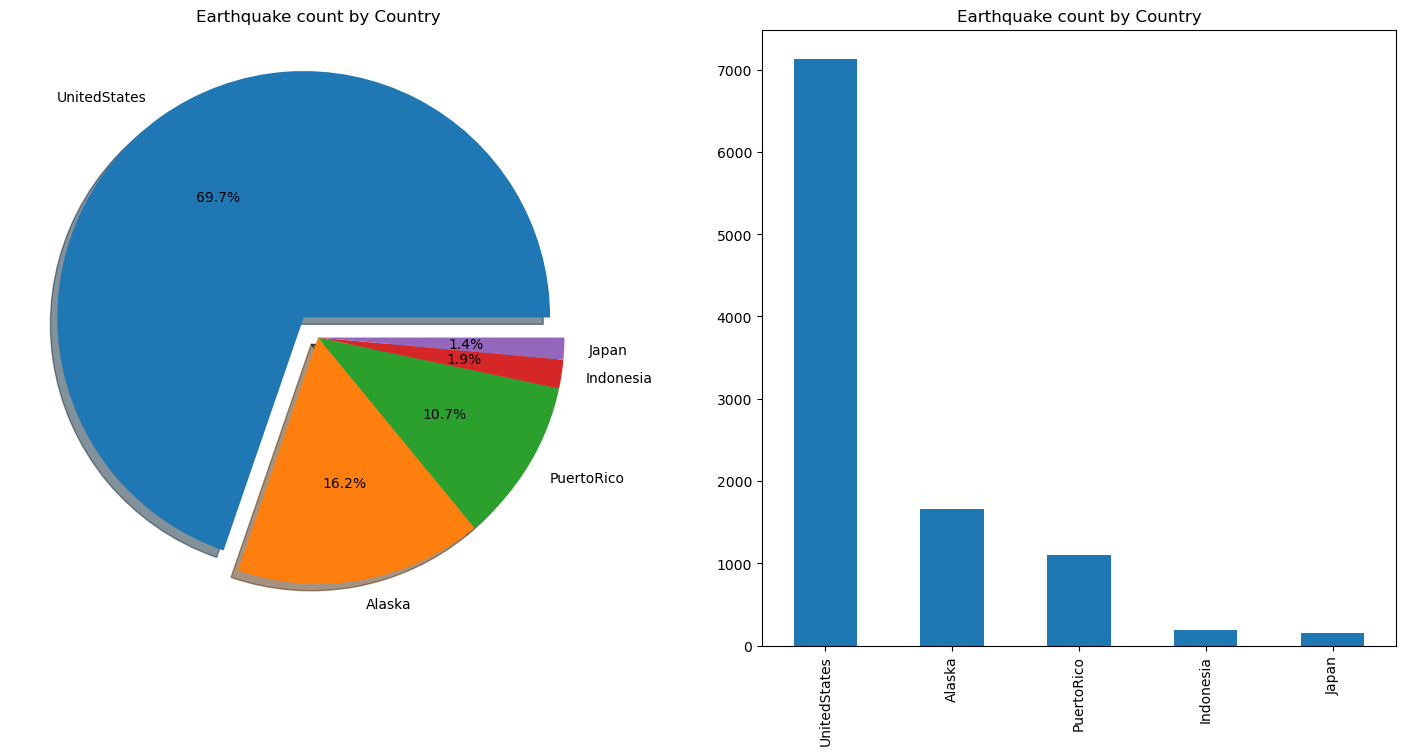

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart for 'Country' column
df['Country'].value_counts().head(5).plot.pie(explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Earthquake count by Country')
ax[0].set_ylabel('')

# Plotting countplot for 'Country' column
ax[1] = df['Country'].value_counts().head(5).plot.bar()
ax[1].set_title('Earthquake count by Country')

plt.show()  # Display the figure